In [1]:
#import dependent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import chardet

In [32]:
#Load the data set
df = pd.read_csv('purchase_data.csv',encoding='latin1')
df.head() #Display first 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


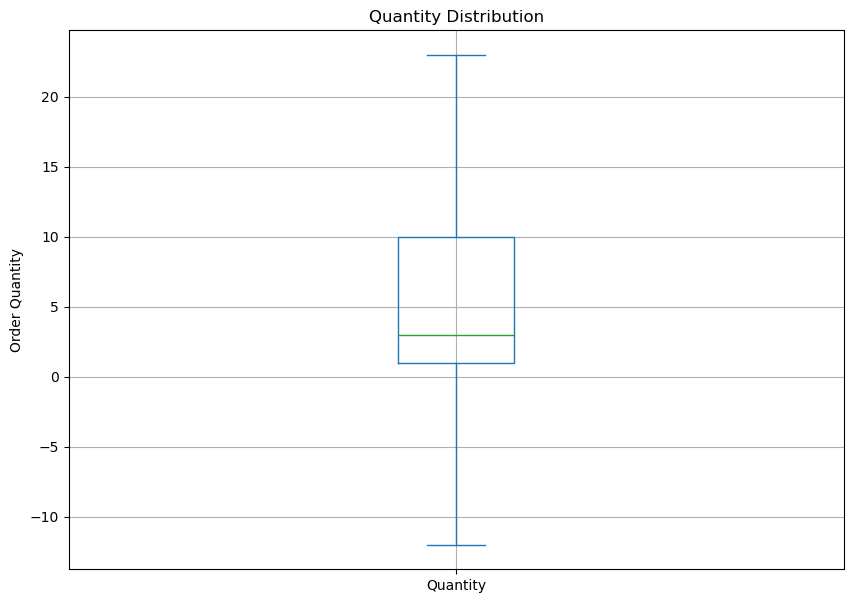

In [33]:
ax = df['Quantity'].plot.box(
    showfliers = False,
    grid = True,
    figsize = (10, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

The canceled order were represented with negative values therefore we will filter them out before proceeding with  thw analysis

In [34]:
df = df.loc[df['Quantity'] > 0]

Monthly Flunctuations and transaction count

In [35]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Ensure datetime format
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
print(monthly_orders_df)


InvoiceDate
2010-01-31     136
2010-02-28     143
2010-03-31      73
2010-04-30       0
2010-05-31      88
2010-06-30     108
2010-07-31      85
2010-08-31     123
2010-09-30     132
2010-10-31      81
2010-11-30       0
2010-12-31     660
2011-01-31    1364
2011-02-28    1211
2011-03-31    1509
2011-04-30    1452
2011-05-31    1704
2011-06-30    1725
2011-07-31    1750
2011-08-31    1594
2011-09-30    1812
2011-10-31    1930
2011-11-30    2536
2011-12-31     512
Freq: M, Name: InvoiceNo, dtype: int64


In [67]:
# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Keep only rows from the second year onward
df_filtered = df[df['InvoiceDate'].dt.year > df['InvoiceDate'].min().year]

print(df_filtered)


       InvoiceNo StockCode                      Description  Quantity  \
42481     539993     22386          JUMBO BAG PINK POLKADOT        10   
42482     539993     21499               BLUE POLKADOT WRAP        25   
42483     539993     21498              RED RETROSPOT WRAP         25   
42484     539993     22379         RECYCLING BAG RETROSPOT          5   
42485     539993     20718        RED RETROSPOT SHOPPER BAG        10   
...          ...       ...                              ...       ...   
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Sales  \
42481  2011-04-01 10:00:00       1.95     13313

In [69]:
df['InvoiceDate'] = pd.to_datetime(df_filtered['InvoiceDate'])  # Ensure datetime format
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
print(monthly_orders_df)


InvoiceDate
2011-01-31    1364
2011-02-28    1211
2011-03-31    1509
2011-04-30    1452
2011-05-31    1704
2011-06-30    1725
2011-07-31    1750
2011-08-31    1594
2011-09-30    1812
2011-10-31    1930
2011-11-30    2536
Name: InvoiceNo, dtype: int64


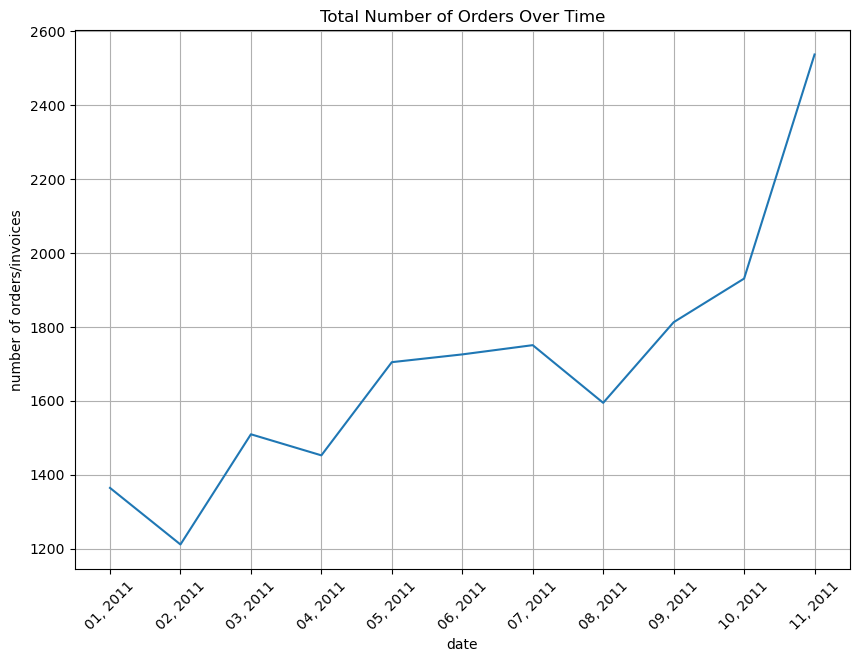

In [70]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10, 7),
    legend =False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)),
    [X.strftime('%m, %Y') for X in monthly_orders_df.index],
    rotation = 45
)
plt.show()

In [71]:
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

print('Min date: %s\nMax: %s' %(invoice_dates.min(), invoice_dates.max()))

Min date: NaT
Max: NaT


* We only have data from December 1, to December 10, 2011. 
* Therefore it will be misrepresentation if we use this data for December sales and revenue.
* Therefore we will disregard it 

In [72]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [73]:
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Ensure datetime format
monthly_orders_df = df_filtered.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
print(monthly_orders_df)


InvoiceDate
2011-01-31    1364
2011-02-28    1211
2011-03-31    1509
2011-04-30    1452
2011-05-31    1704
2011-06-30    1725
2011-07-31    1750
2011-08-31    1594
2011-09-30    1812
2011-10-31    1930
2011-11-30    2536
Freq: M, Name: InvoiceNo, dtype: int64


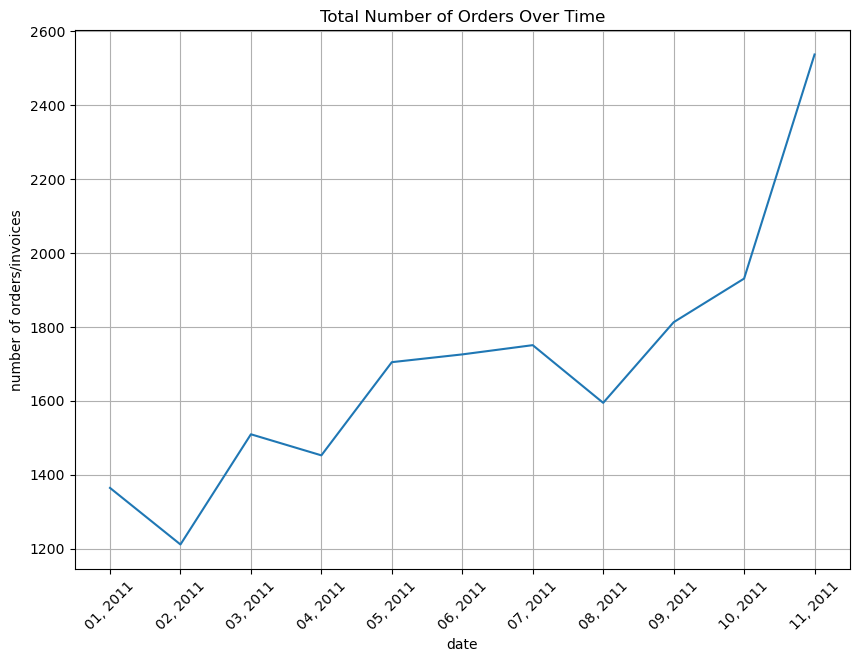

In [74]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10, 7),
    legend =False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)),
    [X.strftime('%m, %Y') for X in monthly_orders_df.index],
    rotation = 45
)
plt.show()

In [75]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

monthly_revenue = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
print(monthly_revenue)

InvoiceDate
2011-01-31     702201.270
2011-02-28     576737.190
2011-03-31     758658.510
2011-04-30     707968.041
2011-05-31     826693.540
2011-06-30     788024.860
2011-07-31     906494.271
2011-08-31     755231.150
2011-09-30    1205462.472
2011-10-31    1029973.780
2011-11-30    1340417.580
Freq: M, Name: Sales, dtype: float64


C:\Users\USER PC\AppData\Local\Temp\ipykernel_4980\1038985786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


InvoiceDate
2011-01    1285
2011-02    1143
2011-03    1400
2011-04    1340
2011-05    1566
2011-06    1588
2011-07    1629
2011-08    1449
2011-09    1666
2011-10    1763
2011-11    2284
Freq: M, Name: InvoiceDate, dtype: int64
